<Figure size 1500x800 with 0 Axes>

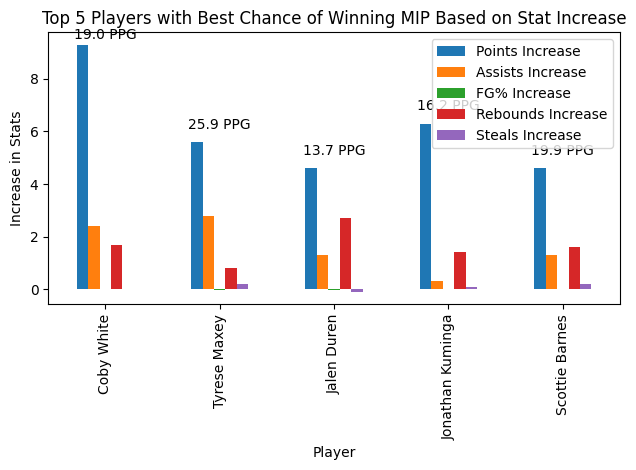

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets for previous and current seasons
previous_season_data = pd.read_csv('../data/PreviousSeasonStats.csv')
current_season_data = pd.read_csv('../data/currSeasonStatsNBA.csv')

# Merge the datasets on the 'Player' column
merged_data = previous_season_data.merge(current_season_data, on='Player', suffixes=('_prev', '_curr'))

# Calculate the increase in stats
merged_data['PTS_increase'] = merged_data['PTS_curr'] - merged_data['PTS_prev']
merged_data['AST_increase'] = merged_data['AST_curr'] - merged_data['AST_prev']
merged_data['FG%_increase'] = merged_data['FG%_curr'] - merged_data['FG%_prev']
merged_data['REB_increase'] = merged_data['TRB_curr'] - merged_data['TRB_prev']
merged_data['STL_increase'] = merged_data['STL_curr'] - merged_data['STL_prev']

# Calculate a simple metric for improvement
merged_data['Improvement_Score'] = (merged_data['PTS_increase'] + 
                                    merged_data['AST_increase'] + 
                                    (merged_data['FG%_increase'] * 10) +  # Weight FG% change
                                    merged_data['REB_increase'] + 
                                    merged_data['STL_increase'])

# Identify the top 5 players with the most significant improvement
top_5_improved_players = merged_data.nlargest(5, 'Improvement_Score')

# Plot the results
plt.figure(figsize=(15, 8))
ax = top_5_improved_players.set_index('Player')[['PTS_increase', 'AST_increase', 'FG%_increase', 'REB_increase', 'STL_increase']].plot(kind='bar')
plt.title('Top 5 Players with Best Chance of Winning MIP Based on Stat Increase')
plt.ylabel('Increase in Stats')
plt.xlabel('Player')
plt.legend(['Points Increase', 'Assists Increase', 'FG% Increase', 'Rebounds Increase', 'Steals Increase'])

# Annotate the current PPG just above the bars, adjust manually if needed
for i, player in enumerate(top_5_improved_players['Player']):
    ppg = top_5_improved_players.loc[top_5_improved_players['Player'] == player, 'PTS_curr'].values[0]
    # Adjust the vertical position to be just above the bars, tweak the offset as needed
    if player == 'Coby White':
        offset = 0.2  # Adjust for Coby White if needed
    else:
        offset = 0.5
    height = max(top_5_improved_players.loc[top_5_improved_players['Player'] == player, ['PTS_increase', 'AST_increase', 'FG%_increase', 'REB_increase', 'STL_increase']].max()) + offset
    plt.text(i, height, f'{ppg} PPG', ha='center')

plt.tight_layout()
plt.show()
